#Gráfico de Barras - Visualização de Categorias# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv('./ecommerce_preparados.csv')

df = df.dropna(subset=['Nota', 'Qtd_Vendidos', 'Marca', 'Material', 'Gênero', 'Temporada','Marca_Freq','Preço_MinMax','Desconto_MinMax']) #

print(df.head())
print(df.info())



   Unnamed: 0                                             Título  Nota  \
1           1  Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...   4.5   
2           2  Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...   4.7   
3           3  Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...   4.6   
4           4  Kit 3 Short Jeans Feminino Cintura Alta Barato...   4.4   
5           5  Blusa + Calça Térmica Treino Futebol Criança I...   4.7   

   N_Avaliações  Desconto            Marca         Material  \
1        3034.0      18.0             lupo          algodão   
2        5682.0      20.0            zorba          algodão   
3        1700.0      22.0             mash          algodão   
4         507.0       9.0     menina linda             jean   
5          58.0       5.0  roupa zero grau  termico unissex   

                Gênero        Temporada  \
1            Masculino   outono/inverno   
2            Masculino     não definido   
3            Masculino  primavera/verão   
4   

Características mais comuns entre os produtos mais vendidos:



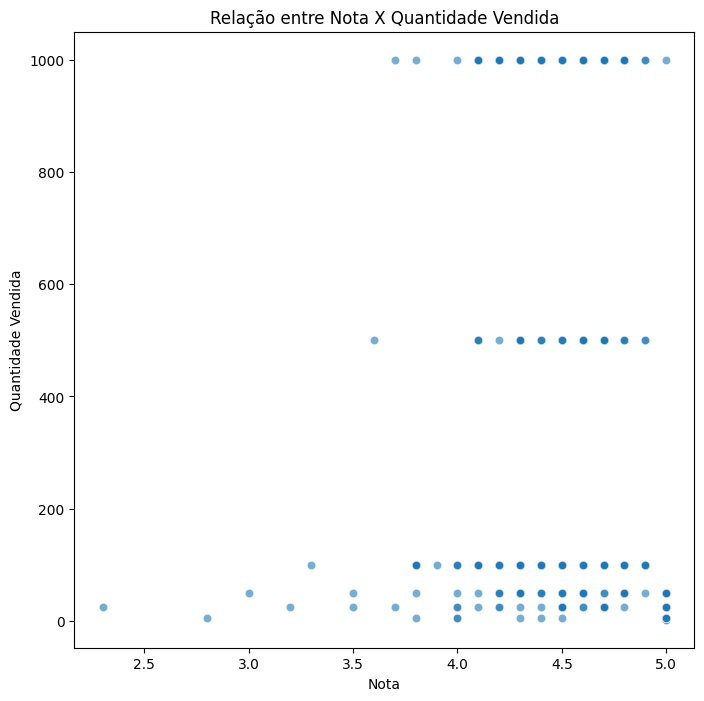

In [12]:
#Gráfico de Dispersão - Utilizado para dados correlacionados.

df['Qtd_Vendidos'] = pd.to_numeric(df['Qtd_Vendidos'], errors='coerce')
top_vendidos = df.nlargest(5, 'Qtd_Vendidos')

print("Características mais comuns entre os produtos mais vendidos:")

print()

plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='Nota', y='Qtd_Vendidos', alpha=0.6)
plt.xlabel('Nota')
plt.ylabel('Quantidade Vendida')
plt.title('Relação entre Nota X Quantidade Vendida')
plt.show()


Neste gráfico, podemos observar uma tendência positiva entre a nota e a quantidade vendida, indicando que os produtos mais bem avaliados tendem a ser mais vendidos.

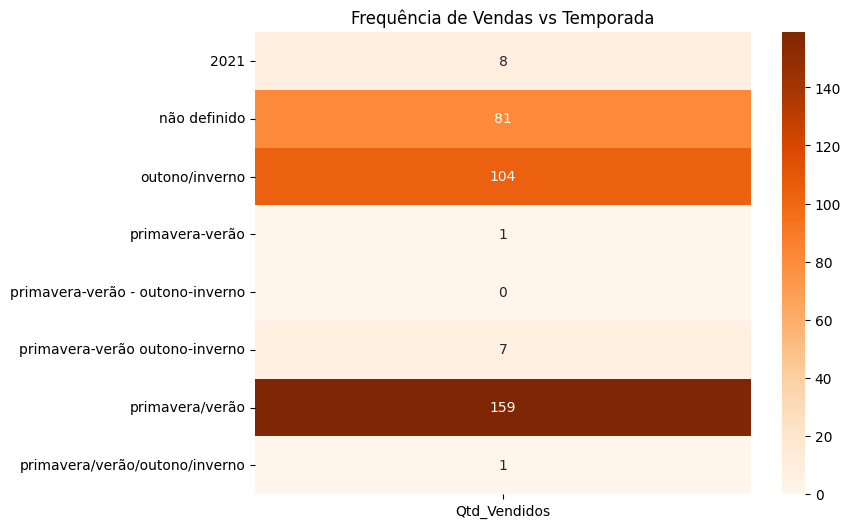

In [13]:
#Gráfico de Calor - Visualização da intesidade/frequência/hábitos de comportamentos.

heatmap_data = df.pivot_table(index='Temporada', values='Qtd_Vendidos', aggfunc='count')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Oranges', fmt='.0f', cbar=True)
plt.title('Frequência de Vendas vs Temporada')
plt.xlabel('')
plt.ylabel('')
plt.show()

Este demonstra a frequência de vendas por temporada, com uma cor mais clara para as temporadas mais populares. Sendo as Temporada Primavera/Verão com maior frequência de vendas.

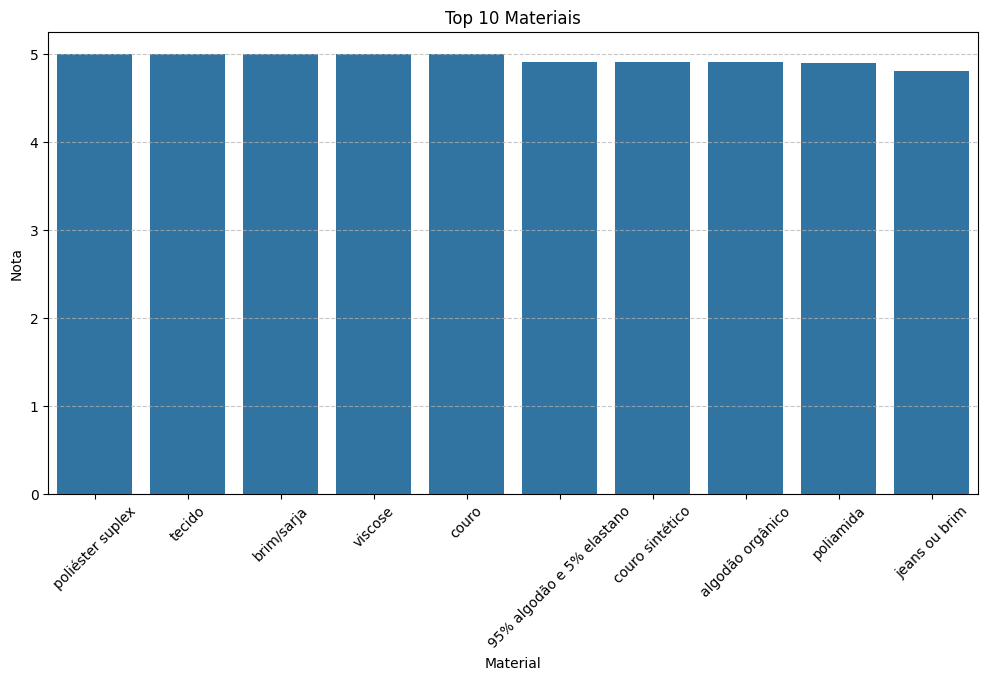

In [14]:
#Gráfico de Barras - Visualização de Categorias


media_notas = df.groupby('Material')['Nota'].mean().sort_values(ascending=False)

top_10_material = media_notas.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_material.index, y=top_10_material.values)

plt.title('Top 10 Materiais')
plt.xlabel('Material')
plt.ylabel('Nota')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observa-se que os materiais mais populares tiveram notas mais altas. Sendo os materiais de couro com maior nota.

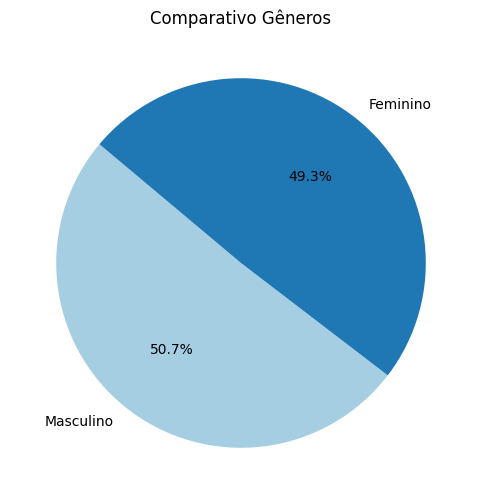

In [15]:
#Gráfico de Pizza - Visualização Ideal para Porcentagens

porcentagem_genero = df[df['Gênero'].isin(['Feminino', 'Masculino'])]['Gênero'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
plt.pie(porcentagem_genero, labels=porcentagem_genero.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Comparativo Gêneros")
plt.show()


A porcentagem de mulheres e homens foi de 52% e 48%, respectivamente. Sem muita discrepancia.

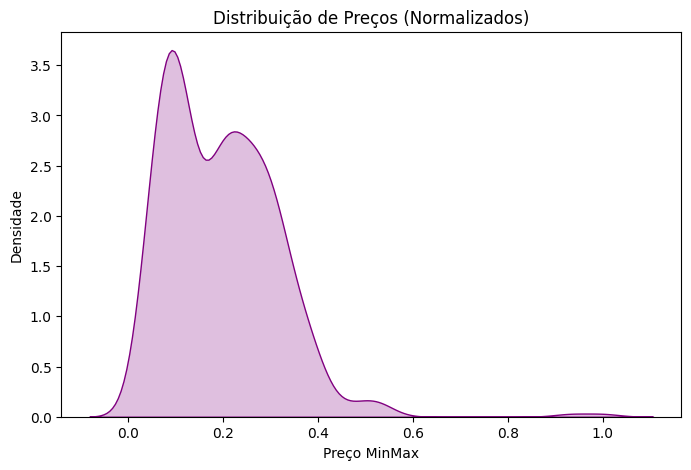

In [16]:
#Gráfico de Densidade (KDE) - Visualização Estatítisca Suaviza dados

plt.figure(figsize=(8,5))
sns.kdeplot(df['Preço_MinMax'], color='purple', fill=True)

plt.title("Distribuição de Preços (Normalizados)")
plt.xlabel("Preço MinMax")
plt.ylabel("Densidade")
plt.show()

Nota-se que neste gráfico, a distribuição de preços normalizados apresenta uma curva bem suave, indicando uma distribuição normalizada, sendo assim, a curva apresenta uma distribuição normal. Detaca-se ainda que os preços apresentam uma distribuição bem concentrada, com uma curva de distribuição de preços bem suave.